# 데이터 로드

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("data/creditcard.csv")
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [2]:
'''
0.0.0.1  Data - Credit Card Fraud Detection Data
28개의 컬럼으로 구성
타겟변수는 Class (0, 1 ; 이진분류)
'''

'\n0.0.0.1  Data - Credit Card Fraud Detection Data\n28개의 컬럼으로 구성\n타겟변수는 Class (0, 1 ; 이진분류)\n'

# 모델링 전 데이터 분석

## 결측치 확인

In [3]:
# 데이터 내 NA값 여부 확인
np.sum(data.isnull().any()==True)

0

## 데이터 기술통계량 확인

In [4]:
print("Credit Card Fraud Detection data -  rows:",data.shape[0]," columns:", data.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 29


In [5]:
data.describe() # 요약 통계량

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,...,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


## 종속변수, 설명변수의 분포 확인

In [6]:
# 종속 변수의 분포 확인
from collections import Counter
Counter(data.Class)

Counter({0: 284315, 1: 492})

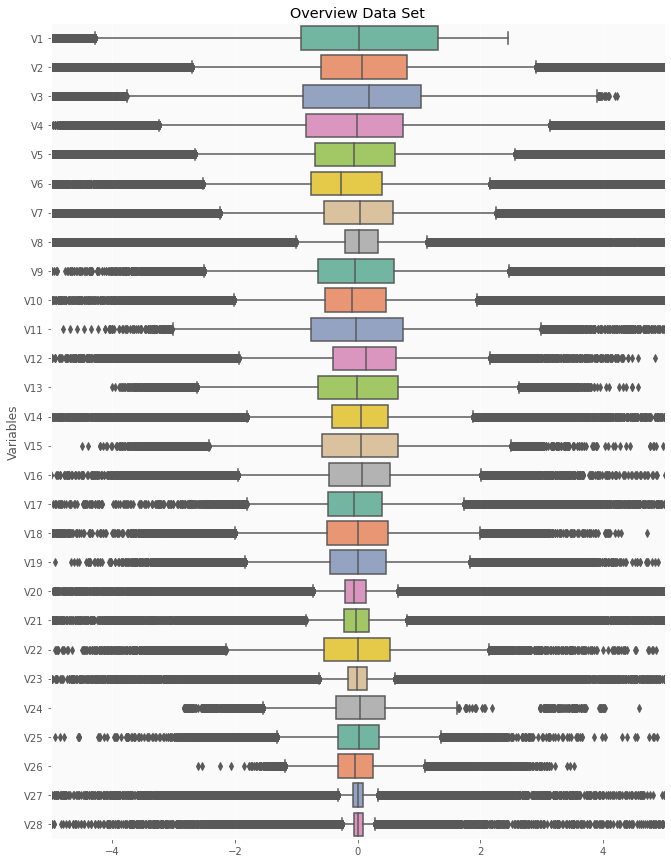

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')  # 그래프 색상 값
ax.set(xlim=(-5, 5))
plt.ylabel('Variables')
plt.title('Overview Data Set')
ax = sns.boxplot(data=data.drop(columns=['Class']), orient='h', palette='Set2')  # V1 ~ V28에 대한 boxplot 확인

<Figure size 432x288 with 0 Axes>

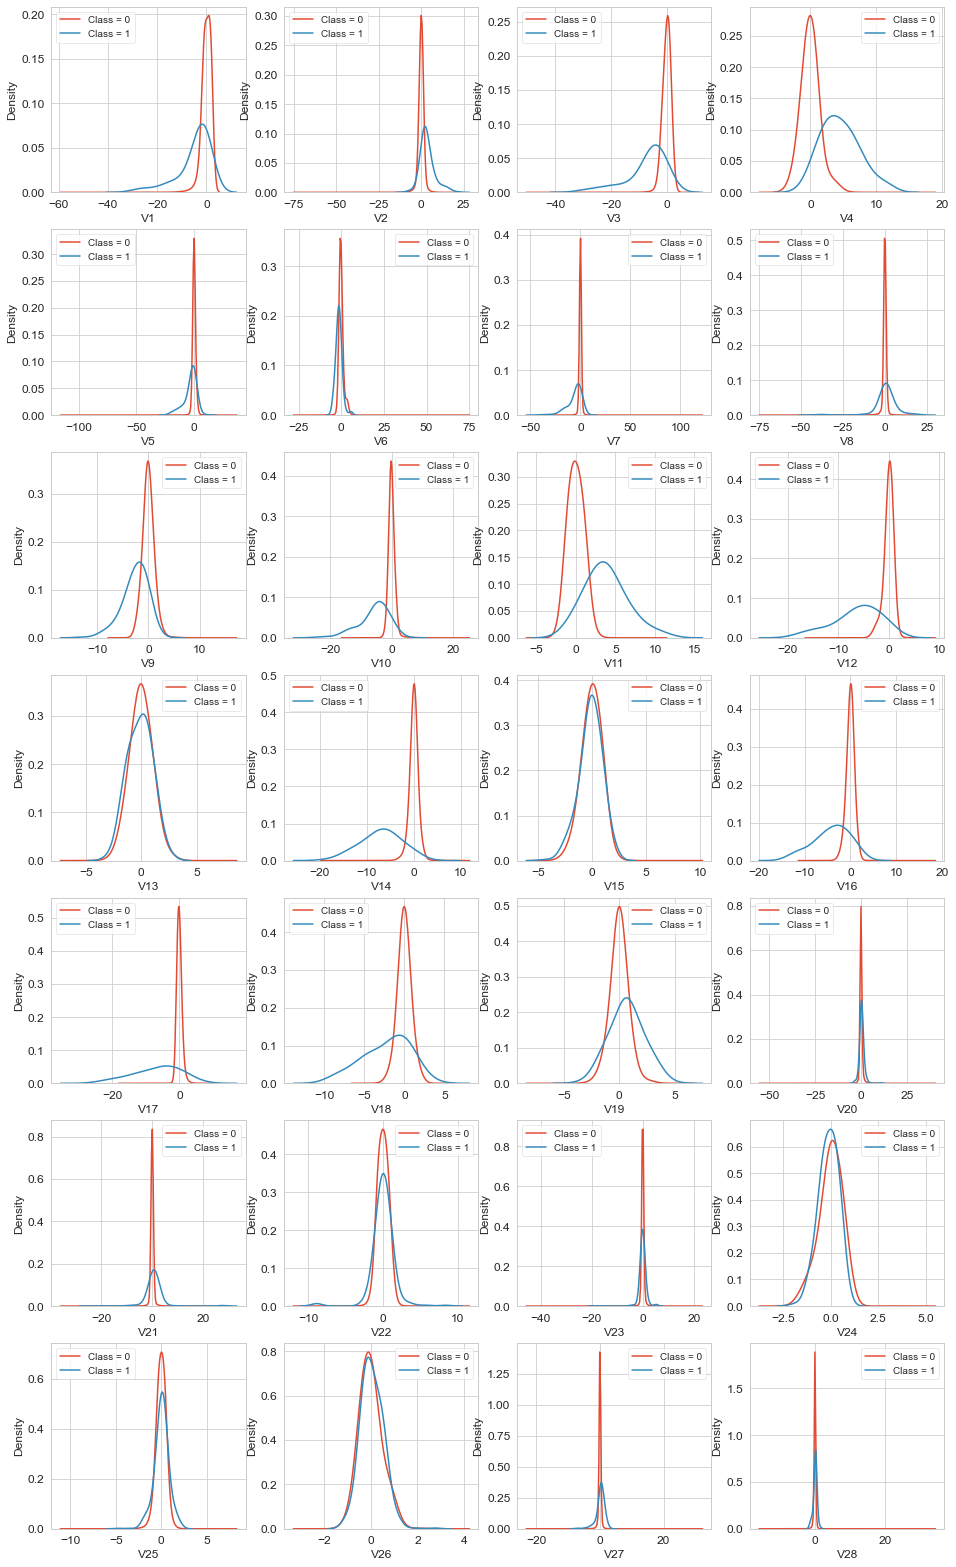

In [8]:
var = data.columns.values[:-1]  # V1 ~ V28
i = 0
t0 = data.loc[data['Class']==0]  # Class==0인 데이터만 추출
t1 = data.loc[data['Class']==1]  # Class==1인 데이터만 추출

sns.set_style('whitegrid')
plt.figure()
fig, x = plt.subplots(8, 4, figsize=(16, 28))

for feature in var:
    i += 1
    plt.subplot(7, 4, i)  # 7 x 4, 28개의 그래프
    sns.kdeplot(t0[feature], bw_method=0.5, label="Class = 0")
    sns.kdeplot(t1[feature], bw_method=0.5, label="Class = 1")   # bw : smoothing parameter
    plt.legend()
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)   # 눈금의 스타일을 설정
plt.show()

각 변수 별 그래프를 타겟변수에 대해서 그려보았을 떄 차이가 있는 변수들은 다음과 같이 정의할 수 있다.  
1) 타겟 변수에 대해 분포 차이가 많이 나는 변수 : V4, V11   
2) 타겟 변수에 대해 분포 차이가 비교적 많이 존재하는 변수 : V12, V14, V18  
3) 타겟 변수에 대해 분포 차이가 비교적 적게 존재하는 변수 : V1, V2, V3, V10  

but class 1의 수가 워낙 작기 떄문에, 변수들간 분포가 다르다는 결론을 내리기는 어렵다

# 데이터 분할

In [9]:
X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (284807, 28)
Shape of y: (284807, 1)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (227845, 28)
Number transactions y_train dataset:  (227845, 1)
Number transactions X_test dataset:  (56962, 28)
Number transactions y_test dataset:  (56962, 1)


# 모델링

## 성능 지표 함수 정의

In [11]:
from sklearn.metrics import confusion_matrix
def model_evaluation(label, predict):
    cf_matrix = confusion_matrix(label, predict)
    Accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / sum(sum(cf_matrix))
    Precision = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[0][1])
    Recall = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[1][0])
    F1_Score = (2 * Recall * Precision) / (Recall + Precision)
    print("Model_Evaluation with Label:1")
    print("Accuracy: ", Accuracy)
    print("Precision: ", Precision)
    print("Recall: ", Recall)
    print("F1-Score: ", F1_Score)

## LightGBM 기본 모델로 설정

In [12]:
import lightgbm as lgb
lgb_dtrain = lgb.Dataset(data=pd.DataFrame(X_train), label=pd.DataFrame(y_train))
lgb_param = {'max_depth': 10, # 트리 깊이
            'n_estimators': 50,  # Number of trees, 트리 생성 개수
            'learning_rate': 0.01, # Step Size
            'objective': 'binary',  # Class 0/1 구분 문제 -> binary
            'force_col_wise': True, "num_leaves":100}
lgb_model = lgb.train(params=lgb_param, train_set=lgb_dtrain)
pred = np.repeat(0, len(y_test))
pred[lgb_model.predict(X_test)>0.5] = 1
model_evaluation(y_test, pred)

D:\Installation\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Info] Number of positive: 391, number of negative: 227454
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001716 -> initscore=-6.365996
[LightGBM] [Info] Start training from score -6.365996
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Model_Evaluation with Label:1
Accuracy:  0.9992451107756047
Precision:  0.9264705882352942
Recall:  0.6237623762376238
F1-Score:  0.7455621301775148


In [13]:
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
lgb_dtrain = lgb.Dataset(data = pd.DataFrame(X_train), label = pd.DataFrame(y_train)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train))) + 1, # 파라미터 추가 num_class보다 1 크도록
            'force_col_wise': True, "num_leaves":100} 
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = np.argmax(lgb_model.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model_predict) # 모델 분류 결과 평가

D:\Installation\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 28
[LightGBM] [Info] Start training from score -0.001718
[LightGBM] [Info] Start training from score -6.367713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Model_Evaluation with Label:1
Accuracy:  0.9992451107756047
Precision:  0.9264705882352942
Recall:  0.6237623762376238
F1-Score:  0.7455621301775148


-> binary문제이기는 하지만, objective : 'multiclass'로 지정해서 사용해도 결과는 동일하다.

## SMOTE을 이용한 Oversampling

In [14]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) # y_train 중 레이블 값이 1인 데이터의 개수
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) # y_train 중 레이블 값이 0 인 데이터의 개수

sm = SMOTE(random_state=42, sampling_strategy=0.3)  # SMOTE 알고리즘, 전체 데이터 중 30% 비율이 되도록 OverSampling
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())  # OverSampling 진행

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [391]
Before OverSampling, counts of label '0': [227454] 

After OverSampling, counts of label '1': 68236
After OverSampling, counts of label '0': 227454


In [15]:
print("Before OverSampling, the shape of X_train: {}".format(X_train.shape)) # SMOTE 적용 이전 데이터 형태
print("Before OverSampling, the shape of y_train: {}".format(y_train.shape))
print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape)) # SMOTE 적용 결과 확인
print('After OverSampling, the shape of y_train: {}'.format(y_train_res.shape))

Before OverSampling, the shape of X_train: (227845, 28)
Before OverSampling, the shape of y_train: (227845, 1)
After OverSampling, the shape of X_train: (295690, 28)
After OverSampling, the shape of y_train: (295690,)


In [16]:
lgb_dtrain2 = lgb.Dataset(data = pd.DataFrame(X_train_res), label = pd.DataFrame(y_train_res)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param2 = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train))) + 1, # 파라미터 추가 num_class보다 1 크도록
            'force_col_wise': True, "num_leaves":50} 
lgb_model2 = lgb.train(params=lgb_param2, train_set=lgb_dtrain2) # 학습 진행
lgb_model_predict2 = np.argmax(lgb_model2.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model_predict2) # 모델 분류 결과 평가

D:\Installation\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 295690, number of used features: 28
[LightGBM] [Info] Start training from score -0.262364
[LightGBM] [Info] Start training from score -1.466339
Model_Evaluation with Label:1
Accuracy:  0.9991924440855307
Precision:  0.7433628318584071
Recall:  0.8316831683168316
F1-Score:  0.7850467289719625


F1-Score와 Recall이 개선되었다  -> SMOTE가 working 했다

### OverSampling 비율 증가시

In [17]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) # y_train 중 레이블 값이 1인 데이터의 개수
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) # y_train 중 레이블 값이 0 인 데이터의 개수

sm2 = SMOTE(random_state=42, sampling_strategy=0.6) # SMOTE 알고리즘, 비율 60%
X_train_res2, y_train_res2 = sm2.fit_resample(X_train, y_train.ravel()) # Over Sampling 진행

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res2==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res2==0)))

Before OverSampling, counts of label '1': [391]
Before OverSampling, counts of label '0': [227454] 

After OverSampling, counts of label '1': 136472
After OverSampling, counts of label '0': 227454


In [18]:
lgb_dtrain3 = lgb.Dataset(data = pd.DataFrame(X_train_res2), label = pd.DataFrame(y_train_res2)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param3 = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train))) + 1, # 파라미터 추가 num_class보다 1 크도록
            'force_col_wise': True, "num_leaves":50} 
lgb_model3 = lgb.train(params=lgb_param3, train_set=lgb_dtrain3) # 학습 진행
lgb_model_predict3 = np.argmax(lgb_model3.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model_predict3) # 모델 분류 결과 평가

D:\Installation\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 363926, number of used features: 28
[LightGBM] [Info] Start training from score -0.470003
[LightGBM] [Info] Start training from score -0.980831
Model_Evaluation with Label:1
Accuracy:  0.9973491099329378
Precision:  0.3893805309734513
Recall:  0.8712871287128713
F1-Score:  0.5382262996941896


F1-Score가 오히려 안 좋아짐

### 1:1로 비율 증가시

In [19]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) # y_train 중 레이블 값이 1인 데이터의 개수
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) # y_train 중 레이블 값이 0 인 데이터의 개수

sm3 = SMOTE(random_state=42) # SMOTE 알고리즘, 비율 1:1
X_train_res3, y_train_res3 = sm3.fit_resample(X_train, y_train.ravel()) # Over Sampling 진행

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res3==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res3==0)))

Before OverSampling, counts of label '1': [391]
Before OverSampling, counts of label '0': [227454] 

After OverSampling, counts of label '1': 227454
After OverSampling, counts of label '0': 227454


In [20]:
lgb_dtrain4 = lgb.Dataset(data = pd.DataFrame(X_train_res3), label = pd.DataFrame(y_train_res3)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param4 = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train))) + 1, # 파라미터 추가 num_class보다 1 크도록
            'force_col_wise': True, "num_leaves":50} 
lgb_model4 = lgb.train(params=lgb_param4, train_set=lgb_dtrain4) # 학습 진행
lgb_model_predict4 = np.argmax(lgb_model4.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model_predict4) # 모델 분류 결과 평가

D:\Installation\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 454908, number of used features: 28
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -0.693147
Model_Evaluation with Label:1
Accuracy:  0.9880622169165408
Precision:  0.11857707509881422
Recall:  0.8910891089108911
F1-Score:  0.2093023255813953


F1-Score가 크게 감소함

* resampling 비율 증가시 Recall은 모두 상승했다(1의 데이터가 많아지므로)
* 하지만 그럴수록 0의 데이터에 대해서 1로 잘못 분류하는 경우가 늘어나므로, Precision은 감소하게 됨 

-> minority data에 대해서 overfitting됨

## BLSM을 이용한 Oversampling

In [21]:
from imblearn.over_sampling import BorderlineSMOTE
sm4 = BorderlineSMOTE(random_state=42, sampling_strategy=0.3)
X_train_res4, y_train_res4 = sm4.fit_resample(X_train, y_train.ravel())

In [22]:
lgb_dtrain5 = lgb.Dataset(data = pd.DataFrame(X_train_res4), label = pd.DataFrame(y_train_res4)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param5 = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train))) + 1, # 파라미터 추가 num_class보다 1 크도록
            'force_col_wise': True, "num_leaves":50} 
lgb_model5 = lgb.train(params=lgb_param5, train_set=lgb_dtrain5) # 학습 진행
lgb_model_predict5 = np.argmax(lgb_model5.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model_predict5) # 모델 분류 결과 평가

D:\Installation\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 295690, number of used features: 28
[LightGBM] [Info] Start training from score -0.262364
[LightGBM] [Info] Start training from score -1.466339
Model_Evaluation with Label:1
Accuracy:  0.99875355500158
Precision:  0.6136363636363636
Recall:  0.801980198019802
F1-Score:  0.6952789699570816


-> 기본 SMOTE가 BSMOTE보다 성능이 좋았다. minority data에 대한 noise / self / borderline 분류가 잘 이루어지지 않은 것으로 보인다.  
(데이터마다 맞는 Oversampling 방식이 다르기 때문에 이와 같이 확인 작업이 필요한다)

## SMOTE를 바탕으로 다양한 모델에 적용

### Logistic & Ridge Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=1e+10)
# sklearn 의 Logistic Regression은 기본적으로 Ridge 정규화가 포함되어 있기 때문에, 
# 정규화 텀을 억제하는 C를 크게 적용한다 (C:Inverse of regularization strength)
lr_model.fit(X_train_res, y_train_res)
lr_predict = lr_model.predict(X_test)
model_evaluation(y_test, lr_predict)

Model_Evaluation with Label:1
Accuracy:  0.992451107756048
Precision:  0.1780821917808219
Recall:  0.900990099009901
F1-Score:  0.2973856209150327


In [24]:
print("1로 예측한 데이터의 개수:", np.sum(lr_predict==1))

1로 예측한 데이터의 개수: 511


### Logistic & Lasso Regression

In [25]:
lasso_model = LogisticRegression(penalty='l2') # Penalty = l2 Regularizer, C = 1.0 (Default))
lasso_model.fit(X_train_res, y_train_res)
lasso_predict = lasso_model.predict(X_test)
model_evaluation(y_test, lasso_predict)

Model_Evaluation with Label:1
Accuracy:  0.992451107756048
Precision:  0.1780821917808219
Recall:  0.900990099009901
F1-Score:  0.2973856209150327


In [26]:
print("1로 예측한 데이터의 개수:", np.sum(lasso_predict==1))

1로 예측한 데이터의 개수: 511


-> Lasso, Ridge의 결과가 동일했고, F1-Score가 매우 낮게 나왔다.  
-> 선형회귀모델은 적절치 않아 보인다.(비선형관계인 것으로 보임)

### RandomForest

In [27]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42) 
                                             # 50번 추정, 트리 최대 깊이 10
rf_model = random_forest_model.fit(X_train_res, y_train_res)
rf_predict = rf_model.predict(X_test)
model_evaluation(y_test, rf_predict)

Model_Evaluation with Label:1
Accuracy:  0.9991748885221726
Precision:  0.7288135593220338
Recall:  0.8514851485148515
F1-Score:  0.7853881278538813


-> 가장 좋은 성능을 보인다.  
-> but, 현재의 데이터는 imbalanced data이기 때문에, 소수의 데이터 중 우연히 일부만 잘 맞춰도 성능이 좋게 나올 수 있다  
-> SMOTE와 model의 random_state를 바꿔보면서 여러번 실험을 해보는 게 좋다

### Catboost

In [28]:
import catboost as cb
cb_dtrain = cb.Pool(data=X_train_res, label=y_train_res)
cb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'eval_metric': 'Accuracy', # 평가 척도
            'loss_function': 'MultiClass'} # 손실 함수, 목적 함수
cb_model = cb.train(pool=cb_dtrain, params=cb_param)
cb_model_predict = np.argmax(cb_model.predict(X_test), axis=1)
model_evaluation(y_test, cb_model_predict)

0:	learn: 0.9694748	total: 1.84s	remaining: 1m 30s
1:	learn: 0.9711218	total: 3.22s	remaining: 1m 17s
2:	learn: 0.9712368	total: 4.77s	remaining: 1m 14s
3:	learn: 0.9719267	total: 6.42s	remaining: 1m 13s
4:	learn: 0.9719740	total: 8.3s	remaining: 1m 14s
5:	learn: 0.9719301	total: 9.61s	remaining: 1m 10s
6:	learn: 0.9717610	total: 10.8s	remaining: 1m 6s
7:	learn: 0.9721025	total: 12.1s	remaining: 1m 3s
8:	learn: 0.9721296	total: 13.5s	remaining: 1m 1s
9:	learn: 0.9720552	total: 14.9s	remaining: 59.4s
10:	learn: 0.9722818	total: 16.6s	remaining: 58.9s
11:	learn: 0.9722243	total: 18s	remaining: 56.9s
12:	learn: 0.9720484	total: 19.3s	remaining: 55s
13:	learn: 0.9721634	total: 20.5s	remaining: 52.8s
14:	learn: 0.9722175	total: 21.8s	remaining: 50.8s
15:	learn: 0.9721161	total: 23.1s	remaining: 49.1s
16:	learn: 0.9720992	total: 24.5s	remaining: 47.5s
17:	learn: 0.9722243	total: 26s	remaining: 46.2s
18:	learn: 0.9721905	total: 27.5s	remaining: 44.9s
19:	learn: 0.9721803	total: 28.8s	remainin

### Ensemble의 Ensemble

* rf_model.predict  -> 0 / 1의 예측값을 산출

In [29]:
import random
bagging_predict_result = []
number_of_bagging = 5
for _ in range(number_of_bagging):
    data_index = [i for i in range(X_train_res.shape[0])]
    random_data_index = np.random.choice(data_index, X_train_res.shape[0])
    random_forest_model2 = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
    target_res = np.array(pd.DataFrame(y_train_res).iloc[random_data_index]).ravel()
    rf_model2 = random_forest_model2.fit(X=pd.DataFrame(X_train_res).iloc[random_data_index, :],
                                         y=target_res)
    rf_predict2 = rf_model2.predict(X_test)
    bagging_predict_result.append(rf_predict2)
    print(_+1, "Model Evaluation Result", "\n")
    model_evaluation(y_test, rf_predict2)

1 Model Evaluation Result 

Model_Evaluation with Label:1
Accuracy:  0.9991748885221726
Precision:  0.7288135593220338
Recall:  0.8514851485148515
F1-Score:  0.7853881278538813
2 Model Evaluation Result 

Model_Evaluation with Label:1
Accuracy:  0.9992275552122467
Precision:  0.7478260869565218
Recall:  0.8514851485148515
F1-Score:  0.7962962962962963
3 Model Evaluation Result 

Model_Evaluation with Label:1
Accuracy:  0.9992099996488887
Precision:  0.7372881355932204
Recall:  0.8613861386138614
F1-Score:  0.7945205479452054
4 Model Evaluation Result 

Model_Evaluation with Label:1
Accuracy:  0.9992802219023208
Precision:  0.7678571428571429
Recall:  0.8514851485148515
F1-Score:  0.8075117370892019
5 Model Evaluation Result 

Model_Evaluation with Label:1
Accuracy:  0.9991748885221726
Precision:  0.7288135593220338
Recall:  0.8514851485148515
F1-Score:  0.7853881278538813


* bagging으로 예측한 결과값에 대해 다수결로 예측

In [30]:
bagging_predict = []
for idx2 in range(X_test.shape[0]):  # 테스트 데이터 개수만큼 반복
    temp_predict = []
    for idx in range(len(bagging_predict_result)):  # Bagging 결과 리스트 개수 만큼 반복
        temp_predict.append(bagging_predict_result[idx][idx2]) 
        # 각 Bagging 결과 예측한 값 중 같은 인덱스를 리스트에 저장
    if np.mean(temp_predict) >= 0.5:
        bagging_predict.append(1)
    elif np.mean(temp_predict) < 0.5:
        bagging_predict.append(0)
model_evaluation(y_test, bagging_predict)

Model_Evaluation with Label:1
Accuracy:  0.9992275552122467
Precision:  0.7478260869565218
Recall:  0.8514851485148515
F1-Score:  0.7962962962962963


* rf_model.predict -> 0 ~ 1의 확률값을 산출

In [31]:
import random
bagging_predict_result = 0
number_of_bagging = 5
for i in range(number_of_bagging):
    data_index = [idx for idx in range(X_train_res.shape[0])]
    random_data_index = np.random.choice(data_index, X_train_res.shape[0])
    random_forest_model2 = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
    target_res = np.array(pd.DataFrame(y_train_res).iloc[random_data_index]).ravel()
    rf_model2 = random_forest_model2.fit(X=pd.DataFrame(X_train_res).iloc[random_data_index, :],
                                         y=target_res)
    rf_predict2 = rf_model2.predict_proba(X_test)[:, 1]
    bagging_predict_result = bagging_predict_result + (rf_predict2)
    print(i)

0
1
2
3
4


In [32]:
np.repeat(0, len(y_test))
pred[bagging_predict_result / 5 > 0.5] = 1
model_evaluation(y_test, pred)

Model_Evaluation with Label:1
Accuracy:  0.9992099996488887
Precision:  0.7413793103448276
Recall:  0.8514851485148515
F1-Score:  0.792626728110599


* 입력한 threshold에 따라서 예측값을 정하는 함수 정의

In [33]:
def cut_off(y, threshold):
    Y = y.copy()
    Y[Y>threshold] = 1
    Y[Y<=threshold] = 0
    return(Y.astype(int))

threshold를 바꿔가면서 적합 결과 파악

In [34]:
threshold = np.arange(0, 1, 0.1)
for i in threshold:
    print(i)
    pred_y = cut_off(bagging_predict_result/5, i)
    model_evaluation(y_test, pred_y)
    print()

0.0
Model_Evaluation with Label:1
Accuracy:  0.001773111899160844
Precision:  0.001773111899160844
Recall:  1.0
F1-Score:  0.003539947076038764

0.1
Model_Evaluation with Label:1
Accuracy:  0.9674344299708577
Precision:  0.048868312757201646
Recall:  0.9405940594059405
F1-Score:  0.09290953545232275

0.2
Model_Evaluation with Label:1
Accuracy:  0.9935219971208876
Precision:  0.19955156950672645
Recall:  0.8811881188118812
F1-Score:  0.3254113345521024

0.30000000000000004
Model_Evaluation with Label:1
Accuracy:  0.998121554720691
Precision:  0.48333333333333334
Recall:  0.8613861386138614
F1-Score:  0.6192170818505338

0.4
Model_Evaluation with Label:1
Accuracy:  0.9989115550718023
Precision:  0.6444444444444445
Recall:  0.8613861386138614
F1-Score:  0.7372881355932204

0.5
Model_Evaluation with Label:1
Accuracy:  0.9992275552122467
Precision:  0.7478260869565218
Recall:  0.8514851485148515
F1-Score:  0.7962962962962963

0.6000000000000001
Model_Evaluation with Label:1
Accuracy:  0.999

-> 0.5 ~ 0.9 사이의 threshold가 가장 적절해보인다. (SMOTE를 수행했기 때문에 threshold가 높은 게 더 적합한 것으로 나온 것)  
F-measure, Precision, Recall 중 중요하다고 생각하는 것을 기준으로 선택하면 된다

### 맞추지 못한 데이터가 뽑힐 확률에 가중치 적용

In [35]:
n = X_train_res.shape[0]
p_list = np.repeat(1/n, n)
wrong_data_idx = rf_model2.predict(X_train_res)!= y_train_res
p_list[wrong_data_idx] = p_list[wrong_data_idx] * 2

In [36]:
p_list

array([3.38192025e-06, 3.38192025e-06, 3.38192025e-06, ...,
       3.38192025e-06, 3.38192025e-06, 3.38192025e-06])

In [37]:
p_list[rf_model2.predict(X_train_res)!= y_train_res]   # 맞추지 못한 데이터에 대해서는 가중치가 올라감

array([6.76384051e-06, 6.76384051e-06, 6.76384051e-06, ...,
       6.76384051e-06, 6.76384051e-06, 6.76384051e-06])

In [38]:
# 확률이므로, 데이터가 뽑힐 확률의 전체 합을 1로 조정
p_list = p_list / sum(p_list)  

In [39]:
bagging_predict_result = 0
number_of_bagging = 5
for i in range(number_of_bagging):
    data_index = [idx for idx in range(X_train_res.shape[0])]
    if i==0 : # 첫번째 시행에서는
        random_data_index = np.random.choice(data_index, X_train_res.shape[0])
    else :  # 두번째 시행 이후부터는
        random_data_index = np.random.choice(data_index, X_train_res.shape[0], p=p_list)  # 데이터가 뽑힐 확률 지정
    random_forest_model2 = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
    target_res = np.array(pd.DataFrame(y_train_res).iloc[random_data_index]).ravel()
    rf_model2 = random_forest_model2.fit(X=pd.DataFrame(X_train_res).iloc[random_data_index, :],
                                         y=target_res)
    rf_predict2 = rf_model2.predict_proba(X_test)[:, 1]
    bagging_predict_result = bagging_predict_result + (rf_predict2)
    print(i)

0
1
2
3
4


In [43]:
for i in threshold :
    pred_y = cut_off(bagging_predict_result/5 ,i)
    print(i)
    model_evaluation(y_test, pred_y)

0.0
Model_Evaluation with Label:1
Accuracy:  0.001773111899160844
Precision:  0.001773111899160844
Recall:  1.0
F1-Score:  0.003539947076038764
0.1
Model_Evaluation with Label:1
Accuracy:  0.9475088655594958
Precision:  0.031462860849821604
Recall:  0.9603960396039604
F1-Score:  0.06092964824120603
0.2
Model_Evaluation with Label:1
Accuracy:  0.9874302166356519
Precision:  0.11320754716981132
Recall:  0.8910891089108911
F1-Score:  0.20089285714285712
0.30000000000000004
Model_Evaluation with Label:1
Accuracy:  0.9961026649345177
Precision:  0.29491525423728815
Recall:  0.8613861386138614
F1-Score:  0.43939393939393945
0.4
Model_Evaluation with Label:1
Accuracy:  0.9985428882412837
Precision:  0.5576923076923077
Recall:  0.8613861386138614
F1-Score:  0.6770428015564203
0.5
Model_Evaluation with Label:1
Accuracy:  0.9991046662687406
Precision:  0.7049180327868853
Recall:  0.8514851485148515
F1-Score:  0.7713004484304933
0.6000000000000001
Model_Evaluation with Label:1
Accuracy:  0.999315